A little notebook to help visualise the official results for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

Data automatically loaded from https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load latest cases
rki_reports = pd.read_csv(
    "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv", 
    parse_dates=['Meldedatum']
)

In [4]:
# bring into easy-to-plot shape
cases  = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlFall', aggfunc='sum'
).sort_index()
deaths = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlTodesfall', aggfunc='sum'
).sort_index()

# cumulate cases and fill in missing dates
all_dates = pd.date_range(start=cases.index[0], end=cases.index[-1])
casesc    = cases.cumsum().reindex(index=all_dates).fillna(method='ffill')
deathsc   = deaths.cumsum().reindex(index=all_dates).fillna(method='ffill')

In [5]:
casesc.tail()

Bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
2020-04-10 00:00:00+00:00,24163.0,32227.0,4487.0,1886.0,469.0,3708.0,5881.0,601.0,7627.0,24557.0,4743.0,2057.0,3624.0,1159.0,2075.0,1445.0
2020-04-11 00:00:00+00:00,24783.0,33004.0,4563.0,1905.0,482.0,3785.0,6033.0,614.0,7757.0,25123.0,4817.0,2079.0,3686.0,1188.0,2118.0,1469.0
2020-04-12 00:00:00+00:00,25121.0,33413.0,4612.0,1931.0,486.0,3830.0,6129.0,617.0,7906.0,25495.0,4884.0,2099.0,3763.0,1200.0,2132.0,1501.0
2020-04-13 00:00:00+00:00,25361.0,33853.0,4671.0,1940.0,492.0,3864.0,6198.0,621.0,7978.0,25751.0,4960.0,2129.0,3795.0,1211.0,2227.0,1519.0
2020-04-14 00:00:00+00:00,25426.0,34269.0,4713.0,1950.0,500.0,3869.0,6342.0,624.0,8018.0,25821.0,5003.0,2145.0,3818.0,1222.0,2240.0,1548.0


In [6]:
# choose a random list of federal states to plot
plot_de = [
    'Hamburg',
    'Bremen',
    'Berlin',
    'Bayern',
    'Nordrhein-Westfalen',
]

In [7]:
germany  = cases.sum(axis=1)
germanyc = casesc.sum(axis=1)
germany.tail()

Meldedatum
2020-04-10 00:00:00+00:00    3128.0
2020-04-11 00:00:00+00:00    2697.0
2020-04-12 00:00:00+00:00    1713.0
2020-04-13 00:00:00+00:00    1451.0
2020-04-14 00:00:00+00:00     938.0
dtype: float64

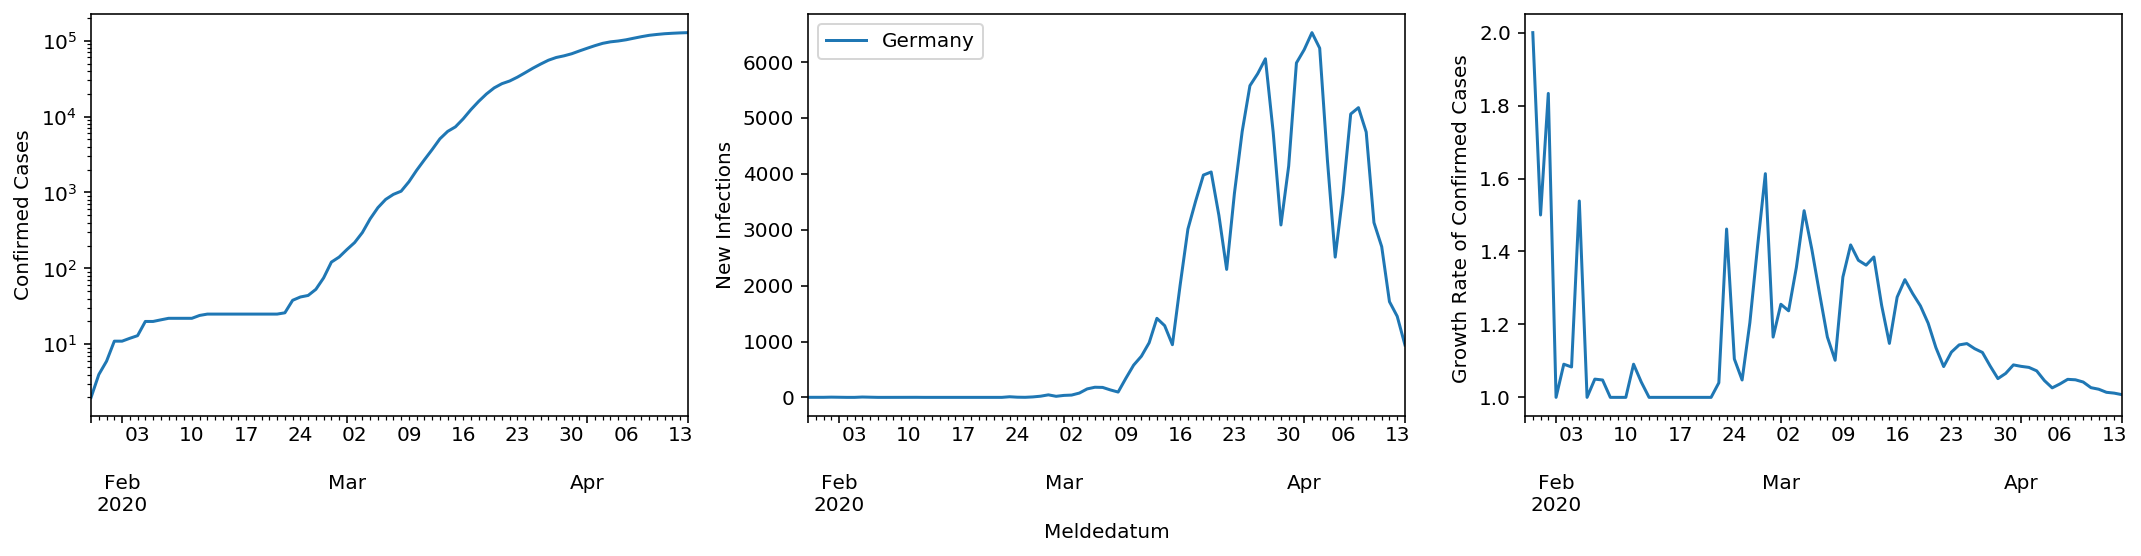

In [8]:
plt.close(1)
fig1, ax1 = plt.subplots(ncols=3, figsize=(15,4), sharex=True, num=1)


germanyc.plot(ax=ax1[0], logy=True)
germany.plot(ax=ax1[1])
(germanyc / germanyc.shift(1)).plot(ax=ax1[2])

ax1[0].set_ylabel('Confirmed Cases')
ax1[1].set_ylabel('New Infections')
ax1[2].set_ylabel('Growth Rate of Confirmed Cases ')

ax1[1].legend(['Germany'])
fig1.tight_layout()

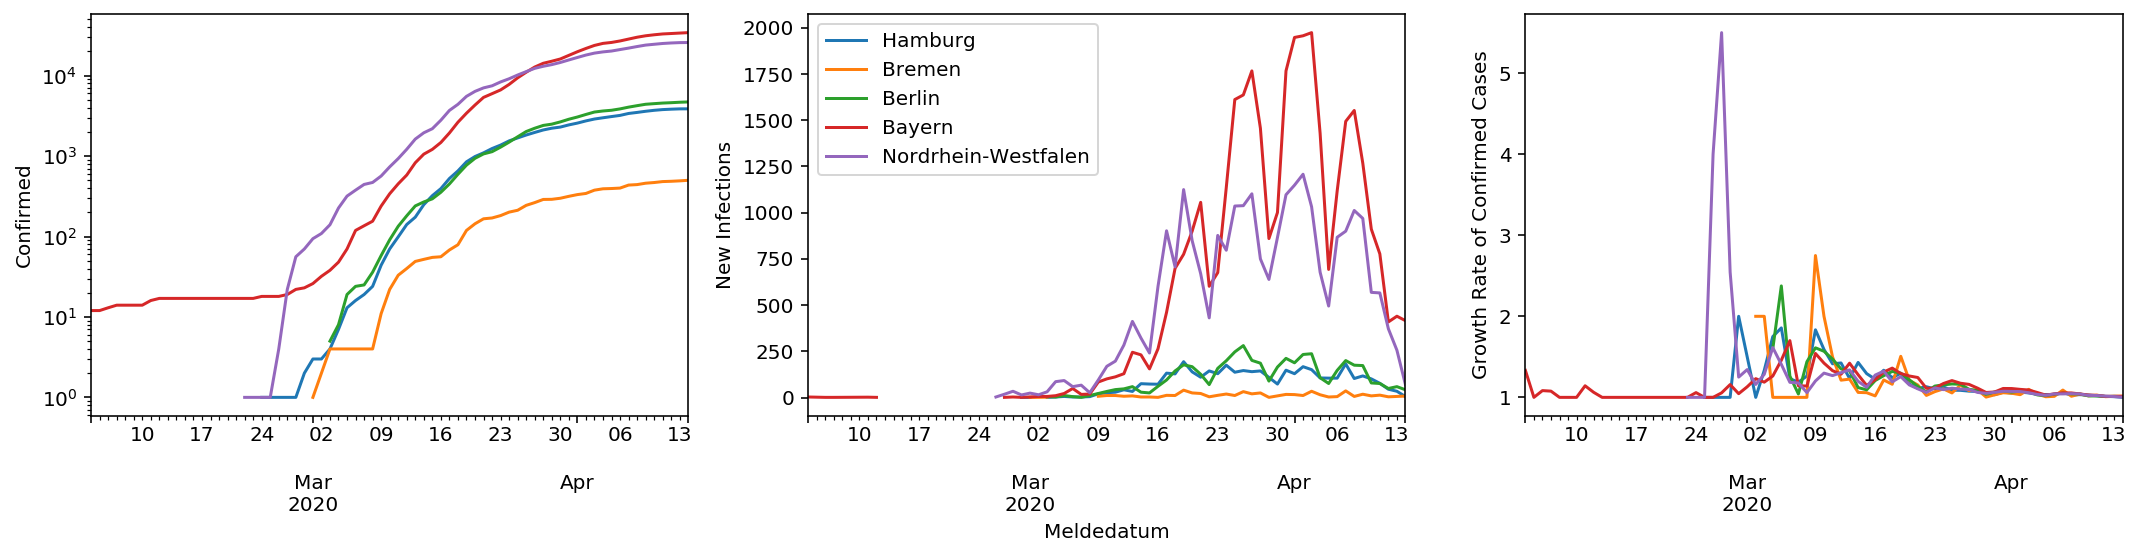

In [9]:
plt.close(2)
fig2, ax2 = plt.subplots(ncols=3, figsize=(15,4), sharex=True, num=2)

# show only last 2 weeks for better visibility
start = cases.index[-1].date() - pd.Timedelta('70d')
end   = cases.index[-1].date()

casesc.loc[start:end, plot_de].plot(ax=ax2[0], logy=True, legend=False)
cases.loc[start:end, plot_de].plot(ax=ax2[1], legend=False)
(casesc / casesc.shift(1)).loc[start:end, plot_de].plot(ax=ax2[2], legend=False)

ax2[0].set_ylabel('Confirmed')
ax2[1].set_ylabel('New Infections')
ax2[2].set_ylabel('Growth Rate of Confirmed Cases')

ax2[1].legend()

fig2.tight_layout()

In [10]:
# save the above figure
#fig2.savefig('covid-19_timeseries_de.png')